<a href="https://colab.research.google.com/github/JimKing100/Multiple_Offers/blob/master/model/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [220]:
import pandas as pd
import numpy as np

from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_tree
import json



In [221]:
df1 = pd.read_csv('titanic.csv')

In [222]:
df2 = df1[['Age', 'Pclass', 'Fare', 'Sex', 'Survived']]

In [223]:
df2.dtypes

Age         float64
Pclass        int64
Fare        float64
Sex          object
Survived      int64
dtype: object

In [224]:
df2["Sex"] = df2["Sex"].astype('category')

/tmp/ipykernel_197360/1760881047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Sex"] = df2["Sex"].astype('category')


In [225]:
list_sex_cat = list(df2['Sex'].cat.categories)
list_sex_cat

['female', 'male']

In [226]:
cat_type_sex = CategoricalDtype(categories=list_sex_cat, ordered=True)
cat_type_sex

CategoricalDtype(categories=['female', 'male'], ordered=True, categories_dtype=object)

In [227]:
export_categories = {'Sex': list_sex_cat}

In [228]:
with open('categories.json', 'w') as fp:
    json.dump(export_categories, fp)

In [229]:
df2["Pclass"] = df2["Pclass"].astype('float64')
df2["Sex"] = df2["Sex"].astype(cat_type_sex)

/tmp/ipykernel_197360/1552489416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Pclass"] = df2["Pclass"].astype('float64')
/tmp/ipykernel_197360/1552489416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Sex"] = df2["Sex"].astype(cat_type_sex)


In [230]:
df2

,Age,Pclass,Fare,Sex,Survived
0,22.0,3.0,7.2500,male,0
1,38.0,1.0,71.2833,female,1
2,26.0,3.0,7.9250,female,1
3,35.0,1.0,53.1000,female,1
4,35.0,3.0,8.0500,male,0
...,...,...,...,...,...
886,27.0,2.0,13.0000,male,0
887,19.0,1.0,30.0000,female,1
888,NaN,3.0,23.4500,female,0
889,26.0,1.0,30.0000,male,1


In [231]:
df2['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: category
Categories (2, object): ['female' < 'male']

In [232]:
y = df2['Survived']
df2 = df2.drop(columns='Survived')

In [238]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=42) 
print(X_train.shape)
print(X_test.shape)

(712, 4)
(179, 4)


In [239]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [240]:
model = XGBClassifier(enable_categorical=True, tree_method='hist')


In [241]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [242]:
X_test

,Age,Pclass,Fare,Sex
709,NaN,3.0,15.2458,male
439,31.0,2.0,10.5000,male
840,20.0,3.0,7.9250,male
720,6.0,2.0,33.0000,female
39,14.0,3.0,11.2417,female
...,...,...,...,...
433,17.0,3.0,7.1250,male
773,NaN,3.0,7.2250,male
25,38.0,3.0,31.3875,female
84,17.0,2.0,10.5000,female


In [243]:
accuracy = accuracy_score(y_test, model.predict(X_test))
accuracy

0.7932960893854749

In [256]:
print(model.predict_proba(X_test[0:1])[0][1])
print(model.predict_proba(X_test[1:2])[0][1])
print(model.predict_proba(X_test[2:3])[0][1])

0.044864085
0.095100604
0.6225437


In [262]:
model.feature_importances_

array([0.04414851, 0.21619959, 0.04494318, 0.6947087 ], dtype=float32)

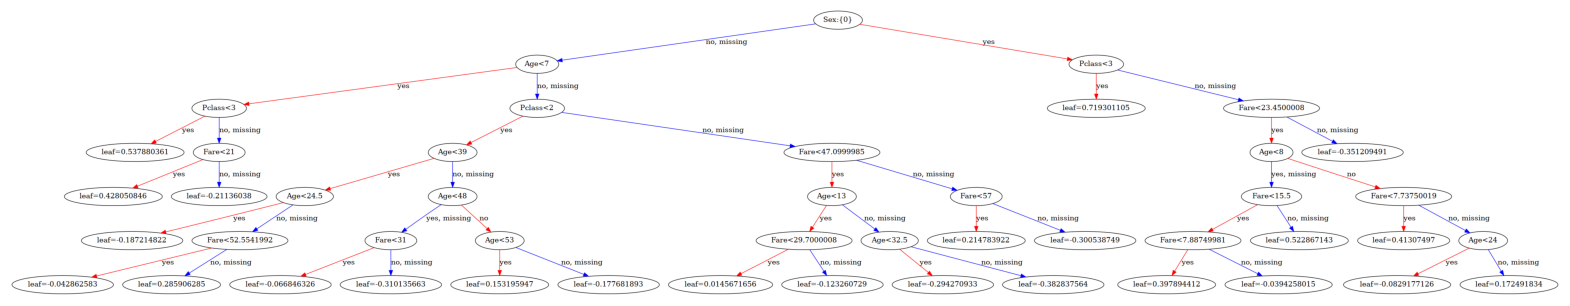

In [263]:
fig, ax = plt.subplots(figsize=(20, 20))  # whatever size you want
plot_tree(model, ax=ax)
plt.show()

In [264]:
model.save_model('model.json')

In [35]:
for x in list(X_test.select_dtypes(include=['category']).columns):
    print(X_test[x].cat.categories)

Index(['female', 'male'], dtype='object')


In [201]:
with open('categories.json', 'r') as fp1:
    read_categories = json.load(fp1)


In [203]:
read_categories['Sex']

['female', 'male']

In [216]:
tt4 = pd.DataFrame({'Age': [20], 'Pclass': [3.0], 'Fare': [7.925], 'Sex': 'female' })

In [217]:
tt4['Sex'] = tt4['Sex'].astype(CategoricalDtype(categories=read_categories['Sex'], ordered=True))

In [218]:
tt4['Sex'].dtypes

CategoricalDtype(categories=['female', 'male'], ordered=True, categories_dtype=object)

In [219]:
tt4['Sex'].cat.codes

0    0
dtype: int8